In [1]:
# Preparation
import numpy as np
np.set_printoptions(precision = 4, suppress = True)
import matplotlib.pyplot as plt
import ipywidgets

## Let's build 2D transformation matrices

In [4]:
def mktr(x, y):
    return np.array([[1,0,x],
                     [0,1,y],
                     [0,0,1]])

def mkrot(theta):
    return np.array([[np.cos(theta),-np.sin(theta),0],
                     [np.sin(theta),np.cos(theta),0],
                     [0,0,1]])

In [16]:
Tab = mktr(1, 0) @ mkrot(np.pi/4)
Tab

array([[ 0.7071, -0.7071,  1.    ],
       [ 0.7071,  0.7071,  0.    ],
       [ 0.    ,  0.    ,  1.    ]])

In [19]:
Pb = np.array([[1,1,1]]).T
Pa = Tab @ Pb
Pa

array([[1.    ],
       [1.4142],
       [1.    ]])

In [25]:
Ka = np.array([[0,1,1]]).T
Tba = np.linalg.inv(Tab)
Kb = Tba @ Ka
Tba

array([[ 0.7071,  0.7071, -0.7071],
       [-0.7071,  0.7071,  0.7071],
       [ 0.    ,  0.    ,  1.    ]])

In [32]:
np.dot(np.ones((2,2)),np.ones((2,2)))

array([[2., 2.],
       [2., 2.]])

In [ ]:
def mktr(x, y):
    return np.array([[1, 0, x],
                     [0, 1, y], 
                     [0, 0, 1]])

def mkrot(theta):
    return np.array([[np.cos(theta), -np.sin(theta), 0],
                     [np.sin(theta), np.cos(theta),  0], 
                     [0,             0,              1]])

Does it work?

In [ ]:
T_a2b = mktr(1,0) @ mkrot(np.pi/4)

In [ ]:
p_b = np.array([[1, 0, 1]]).T
p_a = T_a2b @ p_b
p_a

In [ ]:
T_b2a = np.linalg.inv(T_a2b)
p_b = T_b2a @ p_a
p_b

## Let's draw a reference frame

In [38]:
xhat = np.array([[0,0,1],[1,0,1]]).T
yhat = np.array([[0,0,1],[0,1,1]]).T
Tab @ yhat

array([[1.    , 0.2929],
       [0.    , 0.7071],
       [1.    , 1.    ]])

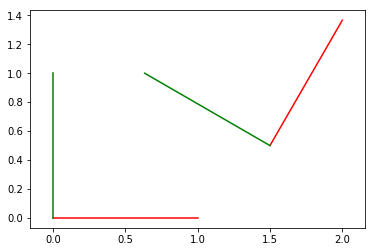

In [41]:
def drawf(f,ax):
    xhat = f @ np.array([[0,0,1],[1,0,1]]).T
    yhat = f @ np.array([[0,0,1],[0,1,1]]).T
    ax.plot(xhat[0,:],xhat[1,:],'r-')
    ax.plot(yhat[0,:],yhat[1,:],'g-')

fig,ax = plt.subplots()
plt.axis("equal")
drawf(np.eye(3),ax)
drawf(mktr(1.5,0.5) @ mkrot(np.pi/3),ax)

In [ ]:
def drawf(f,ax):
    xhat = f @ np.array([[0, 0, 1],
                         [1, 0, 1]]).T
    yhat = f @ np.array([[0, 0, 1],
                         [0, 1, 1]]).T
    ax.plot(xhat[0,:],xhat[1,:],"r-")
    ax.plot(yhat[0,:],yhat[1,:],"g-")

fig,ax = plt.subplots()
plt.axis("equal")
drawf(np.eye(3),ax)
drawf(T_a2b,ax)

Stress testing...

In [43]:
@ipywidgets.interact(
    x = ipywidgets.FloatSlider(min=-2,max=+2,value=0),
    y = ipywidgets.FloatSlider(min=-2,max=+2,value=0),
    rot = ipywidgets.FloatSlider(min=-np.pi,max=np.pi,value=0))
def f(x,y,rot):
    fig,ax = plt.subplots()
    plt.axis("equal")
    drawf(np.eye(3),ax)
    drawf(mktr(x,y) @ mkrot(rot),ax)

interactive(children=(FloatSlider(value=0.0, description='x', max=2.0, min=-2.0), FloatSlider(value=0.0, description='y', max=2.0, min=-2.0), FloatSlider(value=0.0, description='rot', max=3.141592653589793, min=-3.141592653589793), Output()), _dom_classes=('widget-interact',))

In [44]:
@ipywidgets.interact(
    x = ipywidgets.FloatSlider(min=-2,max=+2,value=0),
    y = ipywidgets.FloatSlider(min=-2,max=+2,value=0),
    rot = ipywidgets.FloatSlider(min=-np.pi,max=np.pi,value=0))
def f(x,y,rot):
    fig,ax = plt.subplots()
    plt.axis("equal")
    T = mktr(x,y) @ mkrot(rot)
    cT = np.eye(3)
    for i in range(10):
        drawf(cT,ax)
        cT = cT @ T

interactive(children=(FloatSlider(value=0.0, description='x', max=2.0, min=-2.0), FloatSlider(value=0.0, description='y', max=2.0, min=-2.0), FloatSlider(value=0.0, description='rot', max=3.141592653589793, min=-3.141592653589793), Output()), _dom_classes=('widget-interact',))

## Build the forward kinematics for this robot

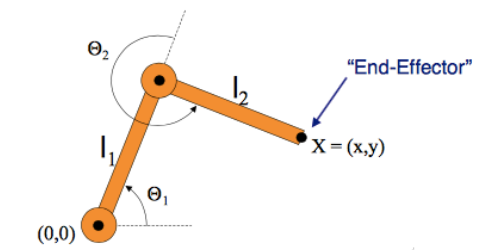

We first define some reference frames
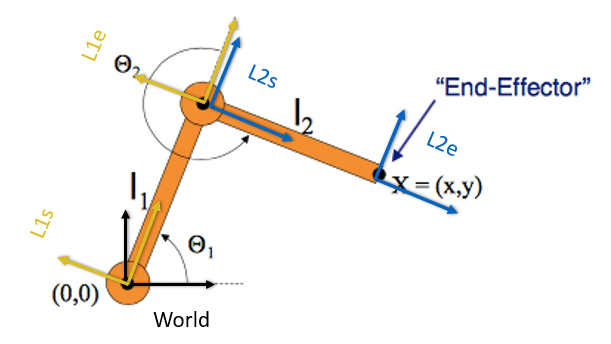

In [47]:
theta1, theta2 = 0.11, 0.2
l1, l2 = 1.2, 0.9
World = np.eye(3)
L1s = World @ mkrot(theta1)
L1e = L1s @ mktr(l1,0)
L2s = L1e @ mkrot(theta2)
L2e = L2s @ mktr(l2,0)
L2e

array([[ 0.9523, -0.3051,  2.0498],
       [ 0.3051,  0.9523,  0.4063],
       [ 0.    ,  0.    ,  1.    ]])

In [ ]:
theta1, theta2 = 0.1, 0.2
l1, l2 = 2, 1.5
world = np.eye(3)
L1s = world @ mkrot(theta1)
L1e = L1s @ mktr(l1,0)
L2s = L1e @ mkrot(theta2)
L2e = L2s @ mktr(l2,0)
L2e

Let's now draw our robot

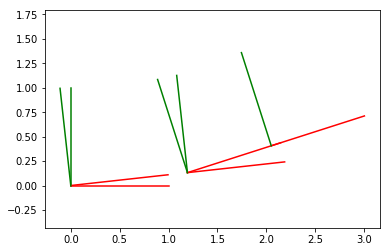

In [49]:
fig,ax = plt.subplots()
plt.axis("equal")
for f in [World,L1s,L1e,L2s,L2e]:
    drawf(f,ax)

In [50]:
@ipywidgets.interact(
    theta1 = ipywidgets.FloatSlider(min=-np.pi,max=+np.pi,value=0),
    theta2 = ipywidgets.FloatSlider(min=-np.pi,max=+np.pi,value=0))
def f(theta1,theta2):
    world = np.eye(3)
    L1s = world @ mkrot(theta1)
    L1e = L1s @ mktr(l1,0)
    L2s = L1e @ mkrot(theta2)
    L2e = L2s @ mktr(l2,0)
    fig,ax = plt.subplots(figsize=(7,7))
    plt.axis("equal")
    for f in [world,L1s,L1e,L2s,L2e]:
        drawf(f,ax)
    ax.set(xlim=(-5,5),ylim=(-5,5))

interactive(children=(FloatSlider(value=0.0, description='theta1', max=3.141592653589793, min=-3.141592653589793), FloatSlider(value=0.0, description='theta2', max=3.141592653589793, min=-3.141592653589793), Output()), _dom_classes=('widget-interact',))